 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Inheritance
- Polymorphism
- Abstraction


## ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [ ]:
class Video():
    def __init__(self):
        self.title = None
        self.runtime = None
        self.language = None 
        self.cast = []
        self.genres = []
        self.description = None
        self.captions = False 
        self.ratings = None

    def add_title(self):
    new_title = input("")
    self.title = new_title

def __repr__(self):
    return f'the {self.ratings} are trash'
    
    

my_video = Video()

print(my_video)








# dont do it this way anymore
# class Car():
#     def __init__(self, make, model):
#         self.make = make
#         self.model = model
        
#     def __repr__(self):
#         return F"this is a {self.make} {self.model}"
        
# honda = Car("Honda", "Civic")

# print(honda.make)
# print(honda)

# honda.make = "chevy"

# class Truck():
#     def __init__(self, make, model):
#         self.make = make
#         self.model = model




In [ ]:
class Test_Video():
    def __init__(self):
        self.title = None

    def add_title(self):
        new_title = input("What are you watching?")
        self.title = new_title


    def __repr__ (self):
        return f'You are now watching {self.title}'

my_video = Test_Video()
print(my_video.title)
my_video.add_title()
print(my_video.title)
print(my_video)

In [25]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image

    def play(self):
        print(f'Now playing: {self.title}')
        display(Image(url = self.link))

    def __len__(self):
        return self.length

    def __repr__(self):
        return f'{self.title} is {self.length.seconds} seconds long'




INHERITANCE


Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [26]:
#episode inherits from video class. Remember the nightblade inherits from Player_character in the homework game you did. 
class Episodes(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.length = timedelta(minutes = data['runtime'])
        if data ['image']:
            self.link = data['image']['medium']
        




## POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [27]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.season = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []

    def get_info(self, query=''):
        data = None
        while not data:
            if not query: 
                query = input('What is the name of the series?')
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
            if r.status_code == 200:
                data = r.json()
                self.id = data['id']
                self.title = data['name']
                self.genres = [genre for genre in data['genres']] #or data['genres']
                if data['network']:
                    self.network = data['network']['name']
                else:
                    self.network = data['webChannel']['name']        

            else:
                print(f'Series Error:{r.status_code}')


       

#    api cal for episodes using the id from the seriese which is self.id

        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json() #list of episode dictionaries that come back from 

            self.seasons = episodes[-1]['season']   #this episode is refrencing the "episodes" in line 36. r.json()
            self.episodes = [Episodes(ep) for ep in episodes] #ep is holding the placeholder for data. each episode {} becomes the data we're passing into an Episode
# the for "Episode is referencing the class Episode in the other cell.         
            print(f'{self.title} has {len(self.episodes)} episodes')
            
        else:
            print(f'Print Episdoe Error: status_code {r.status_code}')


    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input('Are you still watching? Touch grass y/n')
                if watching.lower().strip() not in ("yes", "y", "yeah", "ye", "si", "indeed"):
                    break     #class Video is using .play()
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)


    def __len__(self):
        return len(self.episodes)

    def __repr__(self):
        return f'Title: {self.title}'


In [28]:
my_show = Series()

my_show.get_info("Jujustu Kaisen")

Jujutsu Kaisen has 47 episodes


In [31]:
my_show.watch()

Now playing: None


Now playing: None


Now playing: None


Are you still watching? Touch grass y/n n


In [37]:
class User:
    __id_counter = 1 #class attribute
    def __init__(self,username,password):
        self.username = username
        self.password = password[::-2]
        self.id = User.__id_counter
        User.__id_counter += 1 
        self.watch_list = [] 

    def __str__(self):
        formatted_user = f"""
        {self.id} - {self.username.title()}
        pw: {self.password}
        """
        return formatted_user

    def __repr_(self):
        return f"<User {self.id} | {self.username}>"

    def check_password(self, password_guess):
        return self.password == password_guess[::-2]

## ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>

In [44]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Theatre():
    def __init__(self):
        self.users = set()
        self.current_user = None
#    adding a user to self.users
    def add_user(self):
        username = input("Enter a username:  ")

        if username in (u.username for u in self.users):
            print("User with thatname already exists. Please try another.")

        else:
            password = input("Enter a password:  ")
            user = User(username, password)
            self.users.add(user)
            print(f'{user} has been created')

        self.login_user()

#  login user 
    def login_user(self):
        username = input('What is your username?')
        password = input('What is your password?')

        for user in self.users:
            if user.username == username and user.check_password(password):
                self.current_user = user
                print(f'{user} has logged in')
                break
            else:
                print("Username and/or password is incorrect.")

#     logout a user 
    def logout(self):
        self.current_user = None
        print("You logged out")

#      update user info
    def update_user(self):
        if self.current_user:
            print(self.current_user)
            new_user = input("Please enter the updated username or enter skip to keep your current username")
            if new_user.lower() != "skip":
                self.current_user.username = new_user
            new_pw = input("Enter the updated password or enter skip to keep the current password")
            if new_pw != "skip":
                self.current._user.password = new_pw
            print(f"{self.current_user.username}'s info has been updated!")
        else:
            print("Please login to update your information")
            self.login_user()

#------------------------------------------------------------------------------------------------------------------------------------
#watchlist section

#add to watchlist
    def add_to_watchlist(self, query=""):
        if self.current_user:
            show = Series()
            show.get_info(query)
            self.current_user.watch_list.append(show)

            print(f'{show.title} has been added to watchlist.')
        else:
            print('Please sign in to add to your watchlist')
            self.login_user()

# View watchlist ------------------------------------------------
    def view_watch_list(self):
        if self.current_user:
            for series in self.current_user.watch_list:
                print(f'\n\n {series} | Episodes: {len(series)}')
                print(f'\nSummary: \n {series.summary}')
                display (Image(series.episodes[0].link))
        else:
            print("Please sign in to add to your watchlist")
            self.login_user()

# remove from watchlist --------------------------------
    def delete(self):
        if self.current_user:
            print("Your current watchlist:  ")
            self.view_watch_list()

            response = input('What would you like to remove from your watch list?')

            for series in self.current_user.watch_list:
                if series.title.title() == response.title():
                    self.current_user.watch_list.remove(series)
                    print(f'{response.title()} has been removed from your watch list!')
                    break
            else:
                print("That title is not in your watch list! ") #404 error

            self.view_watch_list()

        else:
            print("Please sign in to add to your watchlist")
            self.login_user()

        
    

    def choose_from_watch_list(self):
        if self.current_user:
            self.view_watch_list()

            watch = input("What would you like to watch?")
            for series in self.current_user.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.watch()
        else:
            reponse = input(f'{watch} is not in your watch list... would you like to add it? y/n')
            if response in ("yes", "y"):
                self.add_to_watch_list(watch)

                print("......")
                sleep(2)
                print(".......")
                self.current_user.watch_list[-1].watch()

            else:
                print("Please sign in to add to your watchlist")

# RUN IT----------------------------------
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(url=generic_image))

        if self.users:
            self.login_user()
        else:
            self.add_user()

            print("""
            What would yoi like to do?
            Add - add a new user
            Login - login to your profile
            Update - update user information
            Logout - logout of your profile
            Search - search for shows
            Watch - pick something from watchlist
            View - view your watchlist
            Delete - delete from watchlist
            Quit - close application
            
            """)
        while True:
            response = input("What would you like to do? (add, update, login, search, watch, view, delete, quit?)")

            if response == "search":
                self.add_to_watchlist()
            elif response == "watch":
                self.choose_from_watch_list()
            elif response == "add":
                self.add_user()
            elif response == "logout":
                self.logout()
                new_response = input("What would you like to do next? login, add, quit").lower()
                if new_response == "add":
                    self.add_user()
                elif new_response == "login":
                    self.login_user()
                elif new_response == "quit":
                    print("Thanks!")
                    break

                else:
                    print("Please enter a valid response and try again!")

            elif response == "login":
                self.login_user()
            elif response == " update":
                self.update_user()
            elif response == "view":
                self.view_watch_list()
            elif response == "delete":
                self.delete()
            elif response == "quit":
                print(f'Thanks for watching {self.current_user.username}! Now go outside')
                break
            else: 
                print("Please enter a valid response!")



In [45]:
codeflix = Theatre()

Enter a username:   miguel
Enter a password:   1234



        3 - Miguel
        pw: 42
         has been created


What is your username? miguel
What is your password? 1234



        3 - Miguel
        pw: 42
         has logged in

            What would yoi like to do?
            Add - add a new user
            Login - login to your profile
            Update - update user information
            Logout - logout of your profile
            Search - search for shows
            Watch - pick something from watchlist
            View - view your watchlist
            Delete - delete from watchlist
            Quit - close application
            
            


What would you like to do? (add, update, login, search, watch, view, delete, quit?) search
What is the name of the series? Scrubs


Scrubs has 182 episodes
Scrubs has been added to watchlist.


What would you like to do? (add, update, login, search, watch, view, delete, quit?) delete


Your current watchlist:  


 Title: Scrubs | Episodes: 182

Summary: 
 None


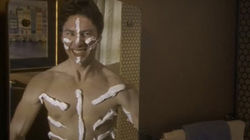

What would you like to remove from your watch list? Scrubs


Scrubs has been removed from your watch list!


What would you like to do? (add, update, login, search, watch, view, delete, quit?) quit


Thanks for watching miguel! Now go outside


In [46]:
codeflix.run()

## Exercise 1

<p>Describe in your own words the following concepts and give an analogy tying to a real-world concept.

#### Difference between a Class and an Object

In [ ]:
They way that I have seen learned to understand what a class is:

A class to my understand is a blueprint or even a template for creating an object or objects. 
a class contains attributes which are variables to can describe the class. In the class example of cars that we did, Car was the class 
and the attributes were model, doors, year and so on. Each are considered variables that later hold specific data. 

An Object is created from the class containing it's own set of attributes but calling from the class, kind of like calling a function, 
which would be Car, if we're still using the example. It can be named anything and asks a place holder. 

The way I can see this is just by the definition that I used for Class. It's like a house. The Class is the blueprint of the house and the object is 
wall colors, furniture or the details that can be arranged.


#### Encapsulation

In [ ]:
Encapsulation from my understanding is a way to restrict data or internal access from outside users. From the example given above, 
the user who is trying to use an app or even work a machine is given access through a button selection but is not given access
to the coding itself. Encapsulation limits the interal access of apps or machines and allows the user to interact with the app or machine
with certain commands and/or buttons. The user doesn't need to know how the code works they just have to know how to access certain areas 
in the app. 

#### Inheritance

In [ ]:
Inheritance, as the name states, is when a certain class acquires or obtains attributes and methods from another Class. 
An analogy would be exactly how the term states:
my grandpa has certain traits that my father inherited whether it would hair, eye color, skin tone, etc. 
Though my father didn't get all of my grandpa's traits, he still acquired some and made some of his own traits that were later passed
on to me. I carry some traits from my father and even my grandfather but still have more own traits or attributes. 

#### Polymorphism

In [ ]:
The way that I try to understand what Polymorphism is, I try to think of a base Class, that has parameters and a method or methods and another class inherts 
from the base Class but with different parameters. Now they may have the same method or methods but call something differently 
because of the class. 

okay this might be a little confusing because putting it into words might confuse me a little:
The analogy I can think of is my tv and my sound bar. I have a remote that can control both but if i try to change the input or adjust the 
volume, my control can't control both at the same time. So I have to push a button on the remote to control a specific device. Now, my control can power 
off both of them but can't control the volumes for both at the same time. 

#### Abstraction

In [ ]:
Abstraction kind of reminds me of encapsulation in the sense that it allows the user to only see what a specific object does rather than
know the intricates of the object. So a user can see that in order to watch a movie on netflix, I need to login but the user can see the intricate 
details in coding and how it works. 

So once again, I'll bring up my remote, my tv and soundbar. My remote can control the volume, change the channel, adjust settings, etc. by the push 
of a button BUT wont it would show me is how the button responds internally with the motherboard and other nodes and channels to the tv. 
It just tells me, "hey if you need to raise the volume, push this button here with this logo or photo." but it doesn't tell me "hey by pushing
here, the pressure of your thumbs presses on a node which then travels to the motherboard sending a laser or signal to the tv... and so on."

the remote can work for both once again, but have different methods to work. 

##  Exercise 2 (Optional):
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads. Make sure you either write out your thoughts in the below cell  or comment where you added code to the above Classes.

In [ ]:
I have an idea like my adding a subcription attribute asking whether the subscribed monthly or annually. but honestly, my brain is still taking
in the past 2 lessons. 